<a href="https://colab.research.google.com/github/krimoe/Deep-learning/blob/main/smile_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# If you happy and I know it you can enter my House 

You'll see how you can in a couple of hours build a deep learning algorithm.

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import h5py
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
from keras.models import Sequential

import pydot
from IPython.display import SVG


import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow


In [ ]:
def load_dataset():
    train_dataset = h5py.File('/content/train_happy.h5','r')
    train_x = np.array(train_dataset['train_set_x'][:])
    train_y = np.array(train_dataset['train_set_y'][:])

    test_dataset = h5py.File('/content/test_happy.h5','r')
    test_x = np.array(test_dataset['test_set_x'][:])
    test_y = np.array(test_dataset['test_set_y'][:])

    # y reshaped
    train_y = train_y.reshape((1, train_x.shape[0]))
    test_y = test_y.reshape((1, test_y.shape[0]))

    return train_x, train_y, test_x, test_y

This dataset can be used to solve the Happy House problem.
Where, we allow a person to enter the house only if he/she is smiling!
So, a smile detector!


![Texte alternatif…](https://raw.githubusercontent.com/Kulbear/deep-learning-coursera/master/Convolutional%20Neural%20Networks/images/house-members.png)



Details of the "Happy" dataset:

* Images are of shape (64,64,3)
* Training: 600 pictures
* Test: 150 pictures


# Load Dataset

In [ ]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig = load_dataset()

# Normalize image vectors
X_train = X_train_orig/255.
X_test = X_test_orig/255. #None

# Reshape
Y_train = Y_train_orig.T
Y_test = Y_test_orig.T #None

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 600
number of test examples = 150
X_train shape: (600, 64, 64, 3)
Y_train shape: (600, 1)
X_test shape: (150, 64, 64, 3)
Y_test shape: (150, 1)


Image shape : (64, 64, 3)


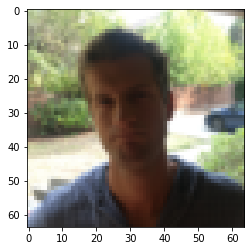

In [ ]:
# Sample image from dataset
print("Image shape :",X_train_orig[10].shape)
imshow(X_train_orig[10])

# Building Model

_________________________________________________________________

conv2d_3 (Conv2D)            (None, 64, 64, 32)        4736      
_________________________________________________________________
batch_normalization_2 (Batch (None, 64, 64, 32)        128       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 32768)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 32769     
_________________________________________________________________



In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization

def build_model():
  model = Sequential([ 
  Conv2D(filters=32, kernel_size=(7,7), activation='relu', padding='same', name='conv2d_3',input_shape=X_train_orig[10].shape),
  BatchNormalization(axis = 3, name = 'batch_normalization_2'),
  MaxPooling2D(pool_size=(2,2), name='max_pooling2d_2'),
  Flatten(name='flatten_2'),
  #Dropout(0.2), #pour résoudre le overfitting   
  Dense(1, activation='sigmoid', name='dense_2'), # pourquoi ici le nombre de noeuds est égale à 1, car ici on a utilisé sigmoid
  ])
  model.compile(optimizer='RMSprop', loss='binary_crossentropy', metrics=["accuracy"])#optimizer=None
  return model
model = build_model()

In [ ]:
history_model = model.fit(x=X_train, y=Y_train, epochs=20, batch_size= 16)#fit(None)

Epoch 1/20
38/38 [==============================] - 1s 5ms/step - loss: 1.6449 - accuracy: 0.6400
Epoch 2/20
38/38 [==============================] - 0s 5ms/step - loss: 0.4489 - accuracy: 0.7933
Epoch 3/20
38/38 [==============================] - 0s 5ms/step - loss: 0.4648 - accuracy: 0.8733
Epoch 4/20
38/38 [==============================] - 0s 5ms/step - loss: 0.3776 - accuracy: 0.8867
Epoch 5/20
38/38 [==============================] - 0s 5ms/step - loss: 0.3941 - accuracy: 0.8800
Epoch 6/20
38/38 [==============================] - 0s 5ms/step - loss: 0.2777 - accuracy: 0.8900
Epoch 7/20
38/38 [==============================] - 0s 5ms/step - loss: 0.1992 - accuracy: 0.9283
Epoch 8/20
38/38 [==============================] - 0s 5ms/step - loss: 0.2184 - accuracy: 0.9167
Epoch 9/20
38/38 [==============================] - 0s 4ms/step - loss: 0.2543 - accuracy: 0.9200
Epoch 10/20
38/38 [==============================] - 0s 5ms/step - loss: 0.1674 - accuracy: 0.9567
Epoch 11/20
38/38 [

In [ ]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 64, 64, 32)        4736      
                                                                 
 batch_normalization_2 (Batc  (None, 64, 64, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 32768)             0         
                                                                 
 dense_2 (Dense)             (None, 1)                 32769     
                                                                 
Total params: 37,633
Trainable params: 37,569
Non-tra

# Evaluate / Test

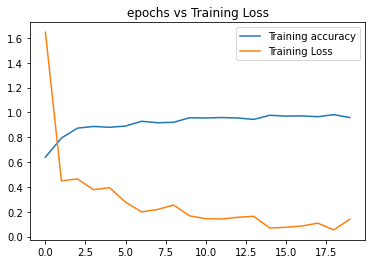

In [ ]:
train_accuracy = history_model.history['accuracy']#history_model.history[None]
train_loss = history_model.history['loss']#history_model.history[None]

count = range(len(train_accuracy))
plt.plot(count, train_accuracy, label='Training accuracy')
plt.plot(count, train_loss, label='Training Loss')
plt.title('epochs vs Training Loss')
#plt.ylim(0.6,1)# pour limité l'intervalle des valeurs de l'axe des y
plt.legend()

Evaluate Test set

In [ ]:
# Code Here
model.evaluate(X_test,Y_test)

5/5 [==============================] - 0s 4ms/step - loss: 0.6464 - accuracy: 0.8067


[0.6464246511459351, 0.8066666722297668]

Confusion Matrix

In [ ]:
# Code Here
import pandas as pd
Y_pred = model.predict(X_test)
Y_pred.shape

(150, 1)

In [ ]:
Y_test.shape

(150, 1)

In [ ]:
from sklearn.preprocessing import Binarizer
binarizer=Binarizer(threshold=0.5)
b=binarizer.fit_transform(Y_pred)
Y_pred=b

In [ ]:
#Y_pred=[1 if x>=0.5 else 0 for x in Y_pred]#autre méthode que la binarization, elle est interessante pour multiclasse

In [ ]:
from sklearn.metrics import f1_score
cm=confusion_matrix(Y_test, Y_pred)
cm
#sns.heatmap(cm)

array([[66,  0],
       [29, 55]])

In [ ]:
score1=f1_score(Y_test, Y_pred)# la précision
score1

0.7913669064748202

**-------------------------------------------------------------comparing different optimizers---------------------------------------------------------**

**with adam optimizer :**

In [ ]:
def build_model():
  model2 = Sequential([ 
  Conv2D(filters=32, kernel_size=(7,7), activation='relu', padding='same', name='conv2d_3',input_shape=X_train_orig[10].shape),
  BatchNormalization(axis = 3, name = 'batch_normalization_2'),
  MaxPooling2D(pool_size=(2,2), name='max_pooling2d_2'),
  Flatten(name='flatten_2'),
  #Dropout(0.2), #pour résoudre le overfitting   
  Dense(1, activation='sigmoid', name='dense_2'), # pourquoi ici le nombre de noeuds est égale à 1, car ici on a utilisé sigmoid
  ])
  model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=["accuracy"])#optimizer=None
  return model2
model2 = build_model()

In [ ]:
history_model = model2.fit(x=X_train, y=Y_train, epochs=20, batch_size= 16)#fit(None)

Epoch 1/20
38/38 [==============================] - 1s 5ms/step - loss: 0.7736 - accuracy: 0.6750
Epoch 2/20
38/38 [==============================] - 0s 5ms/step - loss: 0.2355 - accuracy: 0.9167
Epoch 3/20
38/38 [==============================] - 0s 5ms/step - loss: 0.1918 - accuracy: 0.9333
Epoch 4/20
38/38 [==============================] - 0s 5ms/step - loss: 0.1227 - accuracy: 0.9500
Epoch 5/20
38/38 [==============================] - 0s 5ms/step - loss: 0.0899 - accuracy: 0.9717
Epoch 6/20
38/38 [==============================] - 0s 5ms/step - loss: 0.1135 - accuracy: 0.9450
Epoch 7/20
38/38 [==============================] - 0s 5ms/step - loss: 0.1290 - accuracy: 0.9533
Epoch 8/20
38/38 [==============================] - 0s 5ms/step - loss: 0.0586 - accuracy: 0.9850
Epoch 9/20
38/38 [==============================] - 0s 5ms/step - loss: 0.0471 - accuracy: 0.9867
Epoch 10/20
38/38 [==============================] - 0s 5ms/step - loss: 0.0512 - accuracy: 0.9817
Epoch 11/20
38/38 [

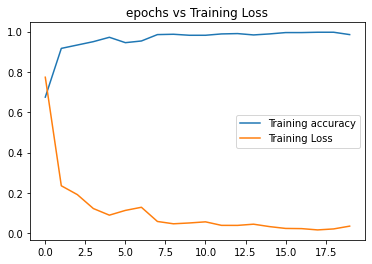

In [ ]:
train_accuracy = history_model.history['accuracy']#history_model.history[None]
train_loss = history_model.history['loss']#history_model.history[None]

count = range(len(train_accuracy))
plt.plot(count, train_accuracy, label='Training accuracy')
plt.plot(count, train_loss, label='Training Loss')
plt.title('epochs vs Training Loss')
#plt.ylim(0.6,1)# pour limité l'intervalle des valeurs de l'axe des y
plt.legend()

In [ ]:
model2.evaluate(X_test,Y_test)

5/5 [==============================] - 0s 4ms/step - loss: 0.1002 - accuracy: 0.9667


[0.10024549812078476, 0.9666666388511658]

In [ ]:
import pandas as pd
Y_pred2 = model2.predict(X_test)
Y_pred2.shape

(150, 1)

In [ ]:
from sklearn.preprocessing import Binarizer
binarizer=Binarizer(threshold=0.5)
b2=binarizer.fit_transform(Y_pred2)
Y_pred2=b2

In [ ]:
from sklearn.metrics import f1_score
cm2=confusion_matrix(Y_test, Y_pred2)
cm2
#sns.heatmap(cm)

array([[64,  2],
       [ 3, 81]])

In [ ]:
score2=f1_score(Y_test, Y_pred2)# la précision
score2

0.970059880239521

** with adagrad optimizer :**

In [ ]:
def build_model():
  model3 = Sequential([ 
  Conv2D(filters=32, kernel_size=(7,7), activation='relu', padding='same', name='conv2d_3',input_shape=X_train_orig[10].shape),
  BatchNormalization(axis = 3, name = 'batch_normalization_2'),
  MaxPooling2D(pool_size=(2,2), name='max_pooling2d_2'),
  Flatten(name='flatten_2'),
  #Dropout(0.2), #pour résoudre le overfitting   
  Dense(1, activation='sigmoid', name='dense_2'), # pourquoi ici le nombre de noeuds est égale à 1, car ici on a utilisé sigmoid
  ])
  model3.compile(optimizer='adagrad', loss='binary_crossentropy', metrics=["accuracy"],run_eagerly=True)#optimizer=None
  return model3
model3 = build_model()

In [ ]:
history_model = model3.fit(x=X_train, y=Y_train, epochs=20, batch_size= 16)#fit(None)

Epoch 1/20
38/38 [==============================] - 1s 16ms/step - loss: 0.7558 - accuracy: 0.7067
Epoch 2/20
38/38 [==============================] - 1s 16ms/step - loss: 0.2556 - accuracy: 0.9117
Epoch 3/20
38/38 [==============================] - 1s 16ms/step - loss: 0.2022 - accuracy: 0.9417
Epoch 4/20
38/38 [==============================] - 1s 16ms/step - loss: 0.1597 - accuracy: 0.9617
Epoch 5/20
38/38 [==============================] - 1s 16ms/step - loss: 0.1432 - accuracy: 0.9617
Epoch 6/20
38/38 [==============================] - 1s 16ms/step - loss: 0.1259 - accuracy: 0.9717
Epoch 7/20
38/38 [==============================] - 1s 15ms/step - loss: 0.1084 - accuracy: 0.9750
Epoch 8/20
38/38 [==============================] - 1s 16ms/step - loss: 0.1025 - accuracy: 0.9750
Epoch 9/20
38/38 [==============================] - 1s 15ms/step - loss: 0.0959 - accuracy: 0.9783
Epoch 10/20
38/38 [==============================] - 1s 15ms/step - loss: 0.0885 - accuracy: 0.9817
Epoch 11/

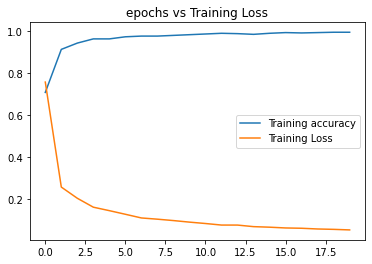

In [ ]:
train_accuracy = history_model.history['accuracy']#history_model.history[None]
train_loss = history_model.history['loss']#history_model.history[None]

count = range(len(train_accuracy))
plt.plot(count, train_accuracy, label='Training accuracy')
plt.plot(count, train_loss, label='Training Loss')
plt.title('epochs vs Training Loss')
#plt.ylim(0.6,1)# pour limité l'intervalle des valeurs de l'axe des y
plt.legend()

In [ ]:
model3.evaluate(X_test,Y_test)

5/5 [==============================] - 0s 11ms/step - loss: 0.1242 - accuracy: 0.9600


[0.12416262179613113, 0.9599999785423279]

In [ ]:
import pandas as pd
Y_pred3 = model3.predict(X_test)
Y_pred3.shape

(150, 1)

In [ ]:
from sklearn.preprocessing import Binarizer
binarizer=Binarizer(threshold=0.5)
b3=binarizer.fit_transform(Y_pred3)
Y_pred3=b3

In [ ]:
from sklearn.metrics import f1_score
cm3=confusion_matrix(Y_test, Y_pred3)
cm3
#sns.heatmap(cm)

array([[64,  2],
       [ 4, 80]])

In [ ]:
score3=f1_score(Y_test, Y_pred3)# la précision
score3

0.963855421686747

** with SGD optimizer :**

In [ ]:
def build_model():
  model4 = Sequential([ 
  Conv2D(filters=32, kernel_size=(7,7), activation='relu', padding='same', name='conv2d_3',input_shape=X_train_orig[10].shape),
  BatchNormalization(axis = 3, name = 'batch_normalization_2'),
  MaxPooling2D(pool_size=(2,2), name='max_pooling2d_2'),
  Flatten(name='flatten_2'),
  #Dropout(0.2), #pour résoudre le overfitting   
  Dense(1, activation='sigmoid', name='dense_2'), # pourquoi ici le nombre de noeuds est égale à 1, car ici on a utilisé sigmoid
  ])
  model4.compile(optimizer='SGD', loss='binary_crossentropy', metrics=["accuracy"])#optimizer=None
  return model4
model4 = build_model()

In [ ]:
history_model = model4.fit(x=X_train, y=Y_train, epochs=20, batch_size= 16)#fit(None)

Epoch 1/20
38/38 [==============================] - 1s 5ms/step - loss: 5.4332 - accuracy: 0.5533
Epoch 2/20
38/38 [==============================] - 0s 5ms/step - loss: 0.8626 - accuracy: 0.6983
Epoch 3/20
38/38 [==============================] - 0s 5ms/step - loss: 0.4859 - accuracy: 0.7983
Epoch 4/20
38/38 [==============================] - 0s 5ms/step - loss: 0.3809 - accuracy: 0.8250
Epoch 5/20
38/38 [==============================] - 0s 5ms/step - loss: 0.2453 - accuracy: 0.9000
Epoch 6/20
38/38 [==============================] - 0s 5ms/step - loss: 0.2380 - accuracy: 0.9100
Epoch 7/20
38/38 [==============================] - 0s 5ms/step - loss: 0.1809 - accuracy: 0.9350
Epoch 8/20
38/38 [==============================] - 0s 5ms/step - loss: 0.1282 - accuracy: 0.9500
Epoch 9/20
38/38 [==============================] - 0s 5ms/step - loss: 0.1101 - accuracy: 0.9667
Epoch 10/20
38/38 [==============================] - 0s 5ms/step - loss: 0.1047 - accuracy: 0.9717
Epoch 11/20
38/38 [

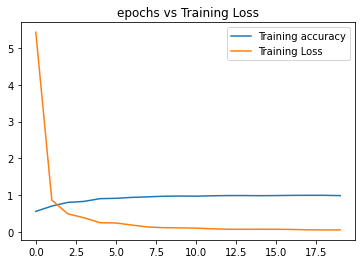

In [ ]:
train_accuracy = history_model.history['accuracy']#history_model.history[None]
train_loss = history_model.history['loss']#history_model.history[None]

count = range(len(train_accuracy))
plt.plot(count, train_accuracy, label='Training accuracy')
plt.plot(count, train_loss, label='Training Loss')
plt.title('epochs vs Training Loss')
#plt.ylim(0.6,1)# pour limité l'intervalle des valeurs de l'axe des y
plt.legend()

In [ ]:
model4.evaluate(X_test,Y_test)

5/5 [==============================] - 0s 5ms/step - loss: 0.1023 - accuracy: 0.9667


[0.10234440118074417, 0.9666666388511658]

In [ ]:
import pandas as pd
Y_pred4 = model4.predict(X_test)
Y_pred4.shape

(150, 1)

In [ ]:
from sklearn.preprocessing import Binarizer
binarizer=Binarizer(threshold=0.5)
b4=binarizer.fit_transform(Y_pred4)
Y_pred4=b4

In [ ]:
from sklearn.metrics import f1_score
cm4=confusion_matrix(Y_test, Y_pred4)
cm4
#sns.heatmap(cm)

array([[63,  3],
       [ 2, 82]])

In [ ]:
score4=f1_score(Y_test, Y_pred4)# la précision
score4

0.9704142011834319

In [ ]:
#Models Comparison
models = pd.DataFrame({
    'Model' : ['RMSprop', 'adam', 'adagrad', 'SGD'],
    'Score' : [score1, score2, score3, score4]
})


models.sort_values(by = 'Score', ascending = False)

,Model,Score
3,SGD,0.970414
1,adam,0.970060
2,adagrad,0.963855
0,RMSprop,0.791367


In [ ]:
import plotly.express as px
px.bar(data_frame = models, x = 'Score', y = 'Model', color = 'Score', template = 'plotly_dark', 
       title = 'Models Comparison')

**On remarque que la précision (f1_score) est plus élévée pour le model avec adagrad optimizer, suivie par celles des model avec adam et SGD réspectivement, et enfin la précision moindre est donnée par le model avec RMSprop optimizer.**

**Displaying images with Predicted & expected labels (Happy-sad)**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from keras.preprocessing.image import ImageDataGenerator # il classifie les images selon le nombre des sous dossiers
test_path = '/content/drive/MyDrive/faces' # ici on écrit le dossier parent pas le sous dossier
test_gen = ImageDataGenerator(brightness_range=[0.9,1.0])# vertical_flip=True, rotation_range=120, zoom_range=[0.3, 0.7],brightness_range=[0.9,1.8]# pour brightness la référence c'est 1, <1 il augmente, >1 il diminue et agit seulement pour les images ayant cette valeur à l'interieur de l'intervalle,vertical_flip:data augmentation, il ne change pas le nombre d'image car dans le cas contraire au moment du fiting il peut prendre dans un seul batch la même image sous différent angle ce qui provoque un overfiting, à chaque epoch il choisit des images au hasard (avec remise) pour leur faire flip
test  = test_gen.flow_from_directory(directory = test_path,class_mode = 'categorical',batch_size=20,target_size = (200, 200))

Found 11 images belonging to 2 classes.


In [ ]:
test_images,test_labels = test.next()

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning:

Palette images with Transparency expressed in bytes should be converted to RGBA images



In [ ]:
test_labels

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.]], dtype=float32)

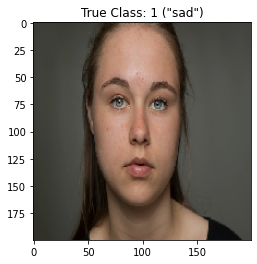

In [ ]:
text_labels = ['happy', 'sad']# j'ai utilisé deux sous-dossier de faces que j'ai només: "happy" et "sad", les images je les ai téléchargées d'internet
import matplotlib.pyplot as plt
test_labels_vec=np.argmax(test_labels,axis=1)

plt.figure()
random_index = np.random.randint(0, 10) # 11 images
#plt.imshow(train_labels_vec[random_index]
#plt.colorbar()
label = test_labels_vec[random_index]
text_description = text_labels[label]
plt.title('True Class: {} ("{}")'.format(label, text_description))
plt.imshow(test_images[random_index,:,:,:].astype("uint8"))

In [ ]:
from skimage.transform import resize
t=resize(test_images[random_index,:,:,:],(1,64,64,3))

In [ ]:
label

1

In [ ]:
t.shape

(1, 64, 64, 3)

In [ ]:
text_labels = ['happy', 'sad']
z=model3.predict(t)

from sklearn.preprocessing import Binarizer
binarizer=Binarizer(threshold=0.5)
bb=binarizer.fit_transform(z)
z=bb

pred_label=["happy" if z==0 else "sad" ]

print("predicted :",pred_label)
print("actual :",text_description)

predicted : ['happy']
actual : sad
